
Tradução: Gabriel S. Ferrante

# **Transformações - Translações e Rotações**

Nesta aula, iremos aprender:
1. Realizar translações em imagens
2. Rotações com o método getRotationMatrix2D
3. Rotações com o método transpose
4. Invertendo imagens

In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



### **Transformações afim**

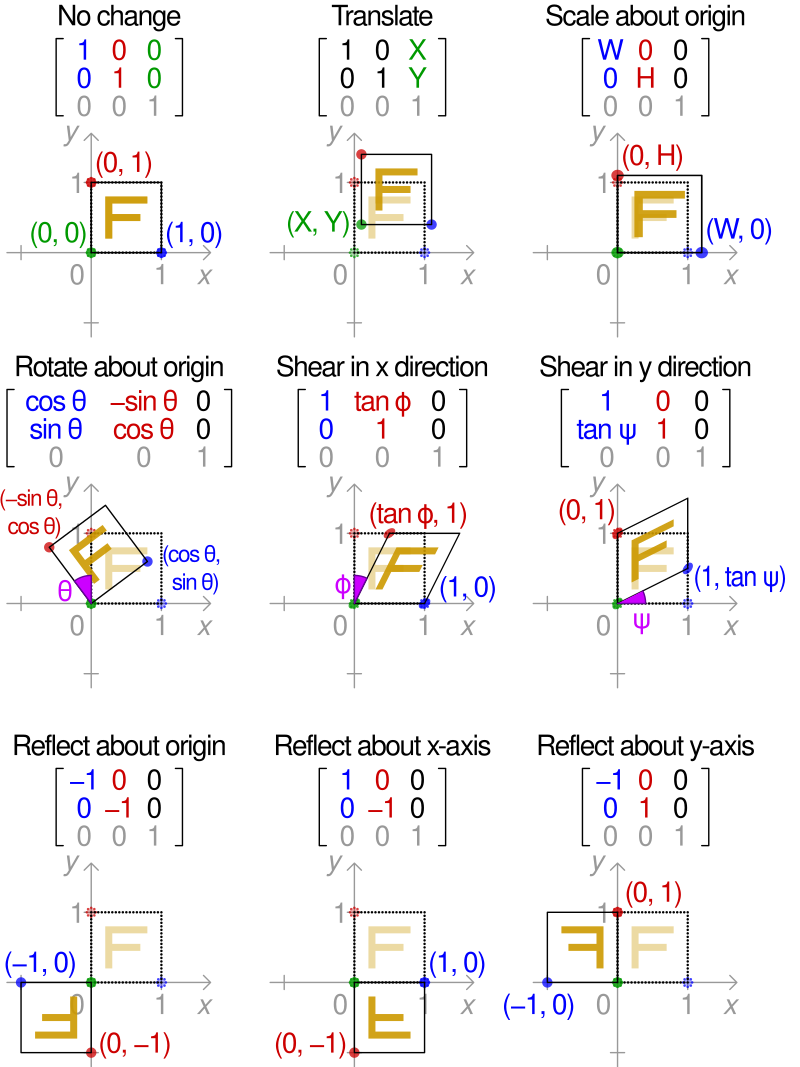

### **Translação**

Esta é uma transformação afim que simplesmente muda a posição de uma imagem. (esquerda ou direita).

Usamos cv2.warpAffine para implementar essas transformações.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

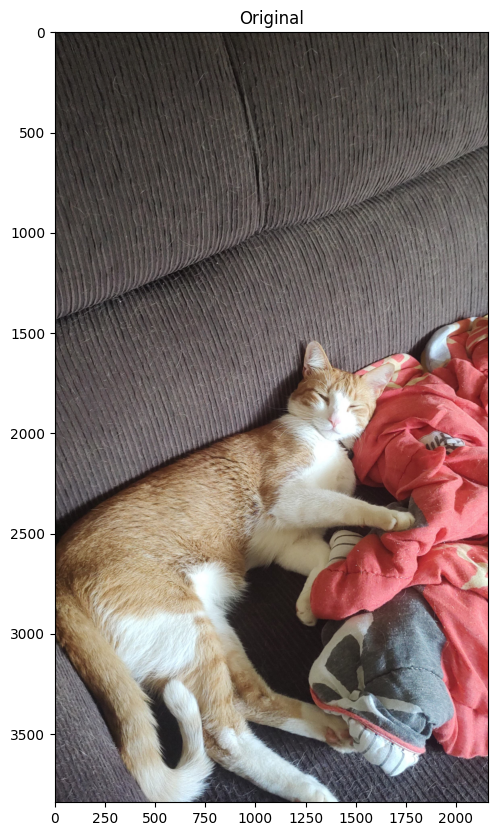

Altura 3840, Largura 2160


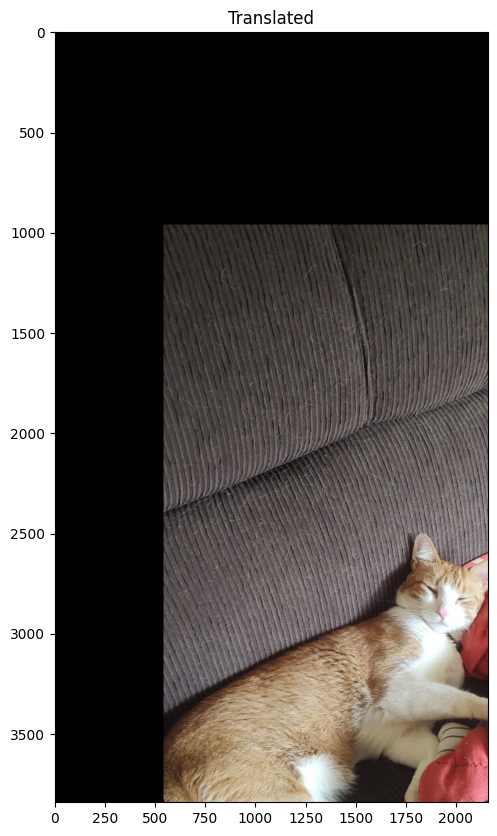

In [21]:

image = cv2.imread('PatricioGatoNenudo.png')
imshow("Original", image)

height, width = image.shape[:2]

print(f'Altura {height}, Largura {width}')

# Nós mudamos um quarto da altura e largura, ou seja, estes valores que irão fazer a imagem andar
quarter_height, quarter_width = height/4, width/4

# Nossa Translação
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T é a nossa matriz de translação
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# Aplicando a matriz T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [22]:
# Vendo os valores  da matriz T
print(T)

print(height, width )

[[  1.   0. 540.]
 [  0.   1. 960.]]
3840 2160


### **Rotações**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


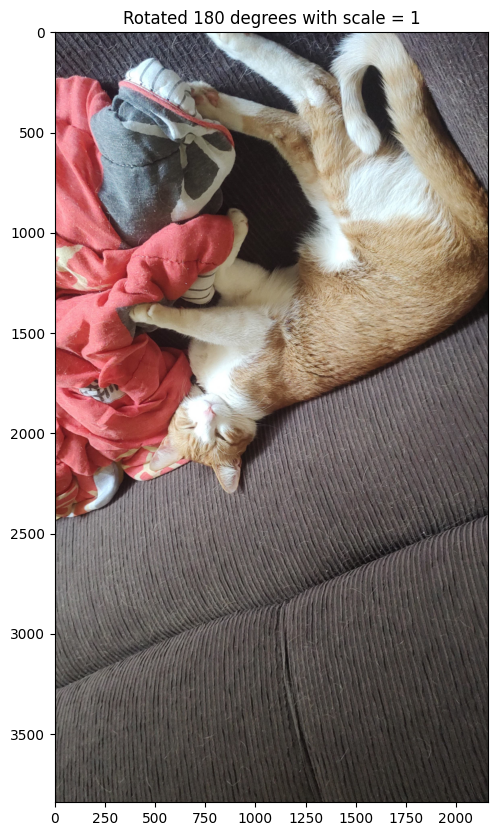

In [23]:

image = cv2.imread('PatricioGatoNenudo.png')
height, width = image.shape[:2]

# Vamos dividir por dois as dimensões para rotacionar pelo centro, em 180 graus, escala 1
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)

# Passando a imagem e a matriz de rotação
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 180 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  1.200000e+02]
 [-5.000000e-01  3.061617e-17  2.460000e+03]]


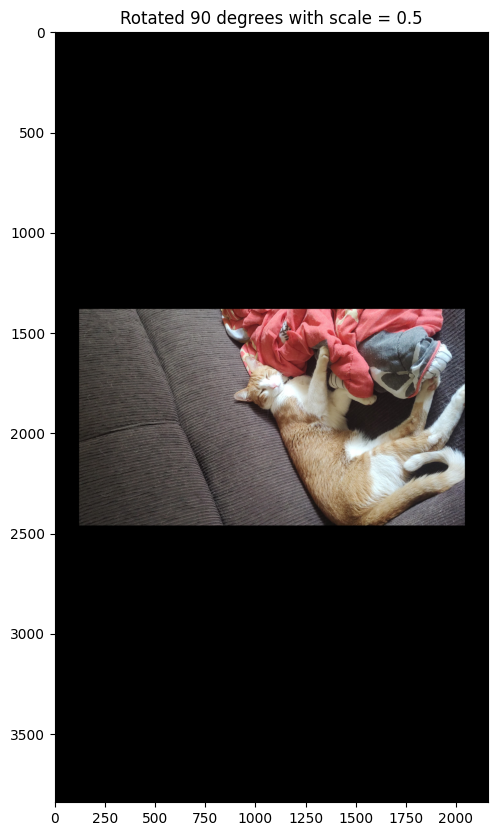

In [24]:
# Dividimos por dois para girar a imagem em torno de seu centro
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

Observe todo o espaço preto ao redor da imagem.

Agora poderíamos cortar a imagem, pois podemos calcular seu novo tamanho (ainda não aprendemos a cortar!).

### **Rotações com cv2.transpose** (menos flexivel), rotação de 90 graus somente, TROCANDO LINHAS POR COLUNAS




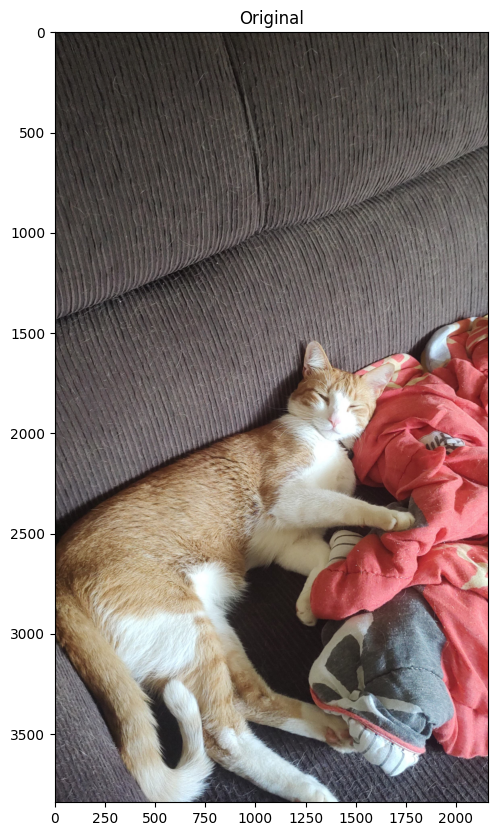

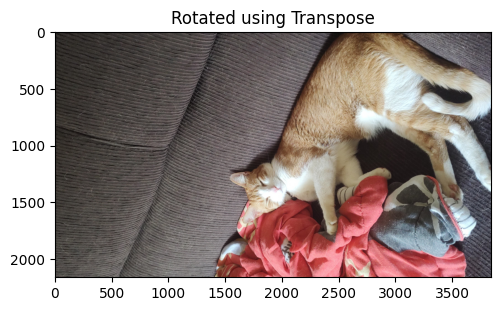

In [25]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

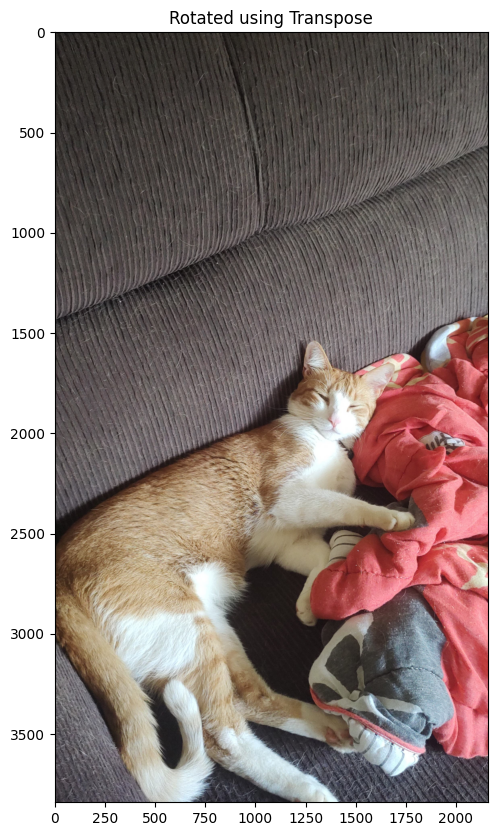

In [26]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

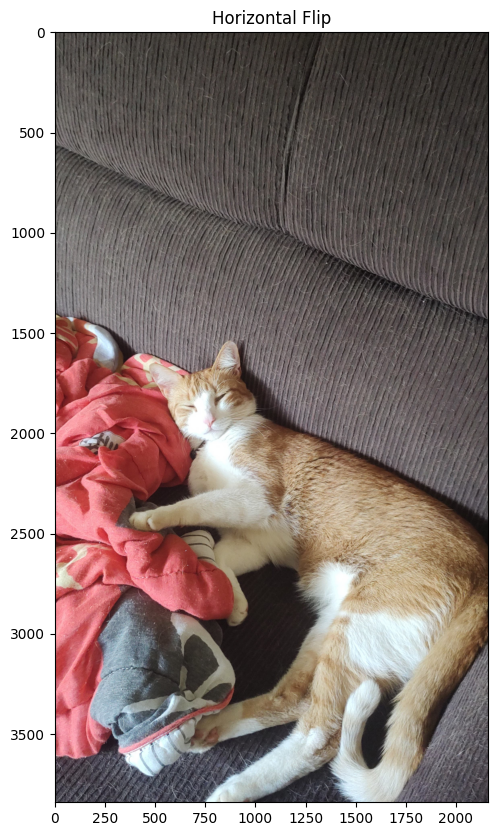

In [27]:
# Inversão Horizontal
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)